### IMPORT LIBRARIES

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

### READ DATA

In [121]:
data = pd.read_csv('movies.csv')

In [122]:
data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
name        7668 non-null object
rating      7591 non-null object
genre       7668 non-null object
year        7668 non-null int64
released    7666 non-null object
score       7665 non-null float64
votes       7665 non-null float64
director    7668 non-null object
writer      7665 non-null object
star        7667 non-null object
country     7665 non-null object
budget      5497 non-null float64
gross       7479 non-null float64
company     7651 non-null object
runtime     7664 non-null float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


### HANDLING MISSING DATA (IF ANY)

In [124]:
for col in data.columns:
    percent_missing = round(np.mean(data[col].isnull()),5)
    print('{} - {}%'.format(col, percent_missing))

name - 0.0%
rating - 0.01004%
genre - 0.0%
year - 0.0%
released - 0.00026%
score - 0.00039%
votes - 0.00039%
director - 0.0%
writer - 0.00039%
star - 0.00013%
country - 0.00039%
budget - 0.28312%
gross - 0.02465%
company - 0.00222%
runtime - 0.00052%


In [207]:
imputed_data = data.copy()
imputed_data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


strdata = imputed_data[['rating', 'released', 'writer', 'star', 'country', 'company']]
numdata = imputed_data[['score', 'votes', 'budget', 'gross', 'runtime']]

for col1 in strdata.columns:
    imputed_data[col1] = strdata[col1].fillna('0')
    
for col2 in numdata.columns:
    imputed_data[col2] = numdata[col2].fillna(0)

In [217]:
clean_data = data.dropna()
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 0 to 7652
Data columns (total 15 columns):
name        5421 non-null object
rating      5421 non-null object
genre       5421 non-null object
year        5421 non-null int64
released    5421 non-null object
score       5421 non-null float64
votes       5421 non-null float64
director    5421 non-null object
writer      5421 non-null object
star        5421 non-null object
country     5421 non-null object
budget      5421 non-null float64
gross       5421 non-null float64
company     5421 non-null object
runtime     5421 non-null float64
dtypes: float64(5), int64(1), object(9)
memory usage: 677.6+ KB


In [218]:
for col in clean_data.columns:
    percent_missing = round(np.mean(clean_data[col].isnull()),5)
    print('{} - {}%'.format(col, percent_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


### CHANGE DATA TYPE (IF THERE'S ANY MISMATCH)

In [219]:
clean_data.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [220]:
clean_data['budget'] = clean_data['budget'].astype('int64')
clean_data['gross'] = clean_data['gross'].astype('int64')
clean_data['votes'] = clean_data['votes'].astype('int64')

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

### CHECKING WHETHER 'YEAR' COLUMN MATCHES WITH YEAR VALUE FROM 'RELEASED' COLUMN

In [231]:
new_data = clean_data.copy()

In [232]:
released_split = new_data['released'].str.split("(", n = 1, expand = True)
new_data['year_correct'] = released_split[0].astype('str').str[-5:-1].astype('int64')

#imputed_data["Last Name"]= new[1]

new_data = new_data[['name', 'rating', 'genre', 'year', 'year_correct', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime']]

new_data.head(5)

,name,rating,genre,year,year_correct,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [233]:
new_data[new_data['year'] != new_data['year_correct']].count()

name            708
rating          708
genre           708
year            708
year_correct    708
released        708
score           708
votes           708
director        708
writer          708
star            708
country         708
budget          708
gross           708
company         708
runtime         708
dtype: int64

In [241]:
alter1 = new_data.drop(columns=['year'])
alter1.head()

,name,rating,genre,year_correct,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [242]:
alter1 = alter1.sort_values(by=['gross'], inplace=False, ascending=False)

### DROP ANY DUPLICATES

In [243]:
alter2 = alter1.drop_duplicates()
alter2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 5445 to 3203
Data columns (total 15 columns):
name            5421 non-null object
rating          5421 non-null object
genre           5421 non-null object
year_correct    5421 non-null int64
released        5421 non-null object
score           5421 non-null float64
votes           5421 non-null int64
director        5421 non-null object
writer          5421 non-null object
star            5421 non-null object
country         5421 non-null object
budget          5421 non-null int64
gross           5421 non-null int64
company         5421 non-null object
runtime         5421 non-null float64
dtypes: float64(2), int64(4), object(9)
memory usage: 677.6+ KB


### CHECKING CORRELATION BETWEEN VARIABLES

plt.scatter(x=alter2['budget'], y=alter2['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget')
plt.show()

alter2[['budget', 'gross']].head()

sns.regplot(x='budget', y='gross', data=alter2, scatter_kws={'color':'purple'}, line_kws={'color':'yellow'})

In [275]:
alter2.corr()

,year_correct,score,votes,budget,gross,runtime
year_correct,1.000000,0.061923,0.203098,0.320312,0.268721,0.075294
score,0.061923,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.203098,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.320312,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.268721,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075294,0.414068,0.352303,0.318695,0.275796,1.000000


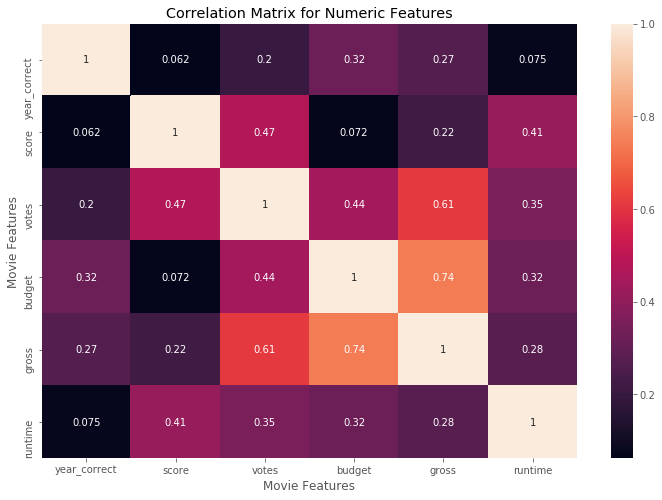

In [268]:
cm = alter2.corr(method='pearson') #pearson, kendall, spearman

sns.heatmap(cm, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [280]:
datacatcode = alter2.copy()

for col_name in datacatcode.columns:
    if (datacatcode[col_name].dtype == 'object'):
        datacatcode[col_name] = datacatcode[col_name].astype('category')
        datacatcode[col_name] = datacatcode[col_name].cat.codes

datacatcode.head()

,name,rating,genre,year_correct,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,386,5,0,2009,527,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162.0
7445,388,5,0,2019,137,8.4,903000,105,513,1470,47,356000000,2797501328,983,181.0
3045,4909,5,6,1997,534,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194.0
6663,3643,5,0,2015,529,7.8,876000,768,1806,356,47,245000000,2069521700,945,138.0
7244,389,5,0,2018,145,8.4,897000,105,513,1470,47,321000000,2048359754,983,149.0


In [281]:
alter2.head()

,name,rating,genre,year_correct,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


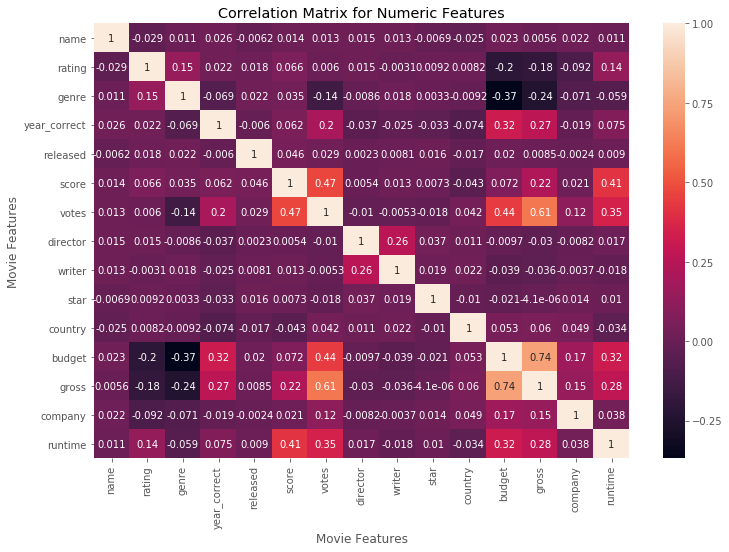

In [273]:
cm2 = datacatcode.corr(method='pearson') #pearson, kendall, spearman

sns.heatmap(cm2, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [279]:
sorted_pairs = datacatcode.corr().unstack().sort_values()
high_corr = sorted_pairs[sorted_pairs > 0.5]
high_corr

votes         gross           0.614751
gross         votes           0.614751
              budget          0.740247
budget        gross           0.740247
name          name            1.000000
director      director        1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
writer        writer          1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
year_correct  year_correct    1.000000
genre         genre           1.000000
rating        rating          1.000000
company       company         1.000000
runtime       runtime         1.000000
dtype: float64

### CONCLUSION

##### "Votes" and "Budget" have the highest correlation to "Gross" earnings